In [1]:
%matplotlib inline
import torch
import torch.nn.functional as F
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.special import softmax
import sys
import model_zoo
import data_freiburg_numpy_to_hdf5
from utils import make_dir_safely, normalize_image
from losses import compute_dice

In [2]:
# Bern data
# This has already done Bern_numpy_to_hdf5.py
basepath = "/usr/bmicnas02/data-biwi-01/jeremy_students/data/inselspital/kady"
bern_tr = h5py.File(basepath + '/bern_images_and_labels_from_101_to_104.hdf5','r')
bern_vl = h5py.File(basepath + '/bern_images_and_labels_from_105_to_106.hdf5','r')
images_tr = bern_tr['images_train']
labels_tr = bern_tr['labels_train']
images_vl = bern_vl['images_validation']
labels_vl = bern_vl['labels_validation']        

30


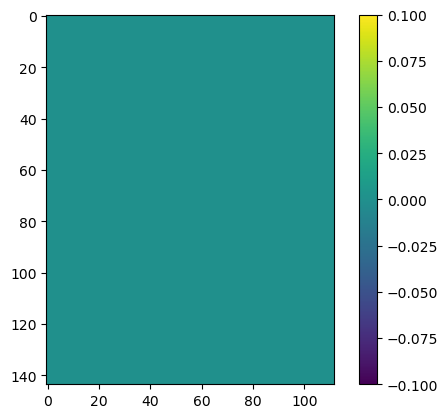

In [122]:
try:
    debug_in = fr_images_tr

    debug_label = fr_labels_tr
    #slice_ = 0

    print(slice_)
    %matplotlib inline
    plt.imshow(debug_in[slice_,:, :, 3,0])
    plt.colorbar()
    #plt.show()
    #plt.imshow(debug_in[slice_, :,:, 3,1])
    plt.imshow(debug_label[slice_, :,:, 3], alpha= 0.0)
    slice_ +=1 
    plt.show()
except:
    pass

28


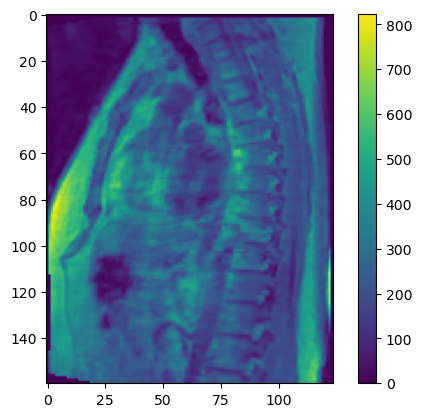

In [577]:
try:
    debug_in = img_cs
    #debug_label = labels_tr
    #slice_ = 0
    print(slice_)
    %matplotlib inline
    plt.imshow(debug_in[:, :,slice_, 3,0])
    plt.colorbar()
    #plt.show()
    #plt.imshow(debug_in[slice_, :,:, 3,1])
    #plt.imshow(debug_label[slice_, :,:, 3], alpha= 0.0)
    slice_ +=1 
    plt.show()
except:
    pass

In [465]:
# Bern data
# This has already done Bern_numpy_to_hdf5.py
basepath = "/usr/bmicnas02/data-biwi-01/jeremy_students/data/inselspital/kady"
res_bern_tr = h5py.File(basepath + '/size_32_bern_images_and_labels_from_101_to_104.hdf5','r')
res_bern_vl = h5py.File(basepath + '/size_32_bern_images_and_labels_from_105_to_106.hdf5','r')
res_images_tr = res_bern_tr['images_train']
res_labels_tr = res_bern_tr['labels_train']
res_images_vl = res_bern_vl['images_validation']
res_labels_vl = res_bern_vl['labels_validation']        

In [60]:
project_data_root = '/usr/bmicnas02/data-biwi-01/jeremy_students/previous_work/nicolas/data/freiburg'
fr_data_tr = data_freiburg_numpy_to_hdf5.load_data(basepath = project_data_root,
                                                            idx_start = 0,
                                                            idx_end = 19,
                                                            train_test='train')
fr_images_tr = fr_data_tr['images_train']
fr_labels_tr = fr_data_tr['labels_train']


fr_data_vl = data_freiburg_numpy_to_hdf5.load_data(basepath = project_data_root,

                                                        idx_start = 20,
                                                        idx_end = 24,
                                                        train_test='validation')
fr_images_vl = fr_data_vl['images_validation']
fr_labels_vl = fr_data_vl['labels_validation']   

Already preprocessed this configuration. Loading now...
Already preprocessed this configuration. Loading now...


In [467]:
pixel_threshold = 0

In [468]:
# Class imbalance in terms of images
print("For Freiburg :", (fr_labels_tr[:].sum(axis =(1,2,3)) > pixel_threshold).sum() / len(fr_labels_tr))

print("For Bern 32 :", (res_labels_tr[:].sum(axis =(1,2,3)) > pixel_threshold).sum() / len(res_labels_tr))

print("For Bern all :", (labels_tr[:].sum(axis =(1,2,3)) > pixel_threshold).sum() / len(labels_tr))

# Class imbalance in terms of images validation
print('Validation')

print("For Freiburg :", (fr_labels_vl[:].sum(axis =(1,2,3)) > pixel_threshold).sum() / len(fr_labels_vl))

print("For Bern 32 :", (res_labels_vl[:].sum(axis =(1,2,3)) > pixel_threshold).sum() / len(res_labels_vl))

print("For Bern all :", (labels_vl[:].sum(axis =(1,2,3)) > pixel_threshold).sum() / len(labels_vl))



For Freiburg : 0.85625
For Bern 32 : 0.7578125
For Bern all : 0.5401785714285714
Validation
For Freiburg : 0.9125
For Bern 32 : 0.75
For Bern all : 0.5384615384615384


In [469]:
2000/(144*112)

0.12400793650793651

In [470]:
np.where((fr_labels_tr[:].sum(axis =(1,2,3)) > 2000) == True)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  36,  37,  38,  39,  40,  41,  42,  43,  44,
         45,  46,  47,  48,  49,  50,  51,  52,  53,  67,  68,  69,  70,
         71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
         84,  85,  86,  87,  88,  89, 102, 103, 104, 105, 106, 107, 108,
        109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121,
        122, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
        148, 149, 150, 151, 152, 153, 167, 168, 169, 170, 171, 172, 173,
        174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186,
        192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204,
        205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217,
        224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236,
        237, 238, 239, 240, 241, 242, 243, 244, 245

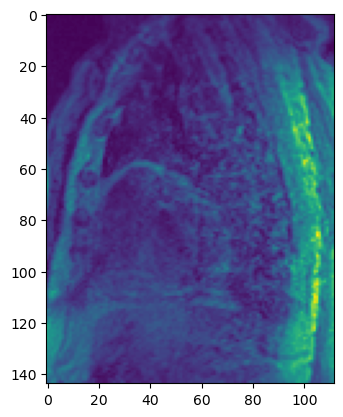

In [471]:
plt.imshow(fr_images_tr[0, :, :, 0, 0])

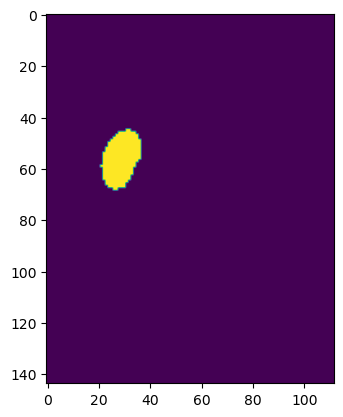

In [472]:
plt.imshow(fr_labels_tr[0, :, :, 0])

In [473]:
# The ratio of the class aorta or not for each training set

# Bern data 32 slices
res_ratio = res_labels_tr[:].sum()/(res_labels_tr.shape[0]*res_labels_tr.shape[1]*res_labels_tr.shape[2]*res_labels_tr.shape[3]
)
print(res_ratio)

# Bern data
ratio = labels_tr[:].sum()/(labels_tr.shape[0]*labels_tr.shape[1]*labels_tr.shape[2]*labels_tr.shape[3])
print(ratio)

# Freiburg data
ratio_fr = fr_labels_tr[:].sum()/(fr_labels_tr.shape[0]*fr_labels_tr.shape[1]*fr_labels_tr.shape[2]*fr_labels_tr.shape[3])
print(ratio_fr)

0.022012115155578292
0.013720753872295446
0.03085835371067915


In [474]:
res_images_tr.shape, res_labels_tr.shape, res_images_vl.shape, res_labels_vl.shape

((128, 144, 112, 48, 4),
 (128, 144, 112, 48),
 (64, 144, 112, 48, 4),
 (64, 144, 112, 48))

In [475]:
def iterate_minibatches_validation(images, labels, batch_size):
    """
    Function to create mini batches from the dataset of a certain batch size
    :param images: input images
    :param labels: labels
    :param batch_size: batch size
    :return: mini batches"""
    assert len(images) == len(labels)
    
    # Generate randomly selected slices in each minibatch

    n_images = images.shape[0]
    random_indices = np.arange(n_images)
    np.random.shuffle(random_indices)

    # Use only fraction of the batches in each epoch

    for b_i in range(0, n_images, batch_size):

        if b_i + batch_size > n_images:
            continue


        # HDF5 requires indices to be in increasing order
        batch_indices = np.sort(random_indices[b_i:b_i+batch_size])

        X = images[batch_indices, ...]
        y = labels[batch_indices, ...]
        
        # ===========================
        # check if the velocity fields are to be used for the segmentation...
        # ===========================

        
        yield X, y


In [476]:
gen = iterate_minibatches_validation(images_tr, labels_tr, 8)


In [477]:
res_gen = iterate_minibatches_validation(res_images_tr, res_labels_tr, 8)

In [478]:
x, y = gen.__next__()
res_x, res_y = res_gen.__next__()

In [479]:
x.shape

(8, 144, 112, 48, 4)

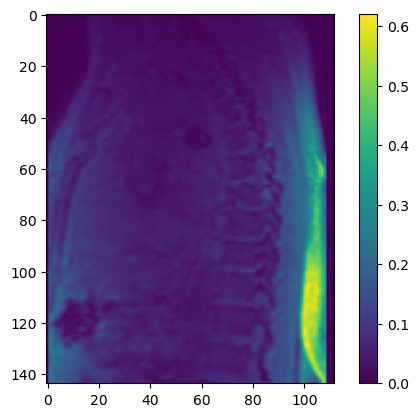

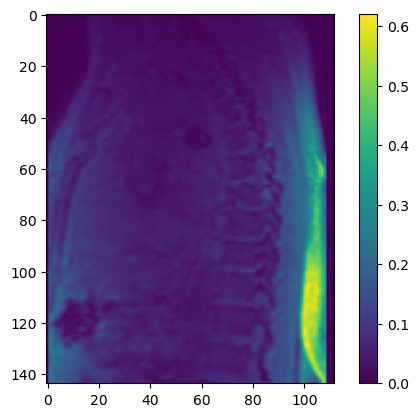

In [480]:
b = 20
plt.imshow(images_tr[b, :,:,3,0])
plt.colorbar()
plt.show()
plt.imshow(res_images_tr[b, :,:,3,0])
plt.colorbar()
plt.show()

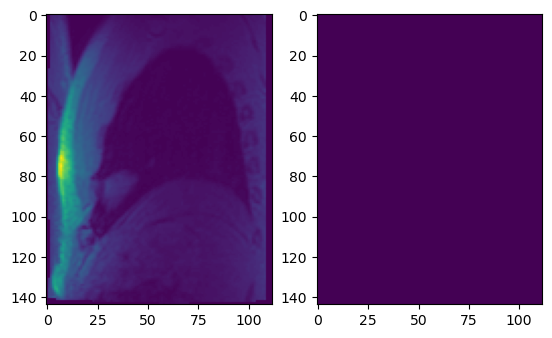

In [481]:
b= 4
t =3
fig, ax = plt.subplots(1,2)
ax[0].imshow(x[b, :,:, t, 0])
ax[1].imshow(y[b, :,:, t,])
plt.show()

In [ ]:
y.sum(axis = (1,2,3))

array([    0,     0,  5846, 47805, 48418, 45552,     0,     0],
      dtype=uint64)

In [ ]:
y.sum(axis = (1,2,3))/(y.shape[1]*y.shape[2]*y.shape[3])

array([0.        , 0.        , 0.00755157, 0.06175208, 0.06254392,
       0.05884177, 0.        , 0.        ])

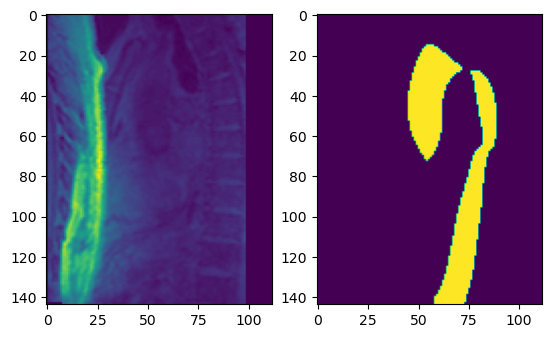

In [ ]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(res_x[b, :,:, t, 0])
ax[1].imshow(res_y[b, :,:, t,])

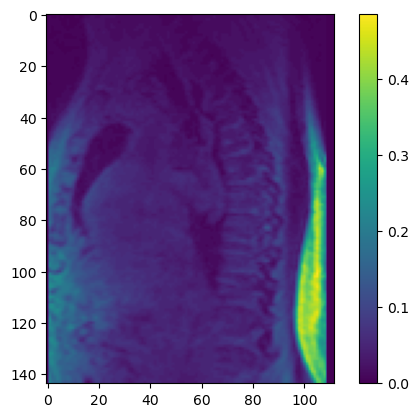

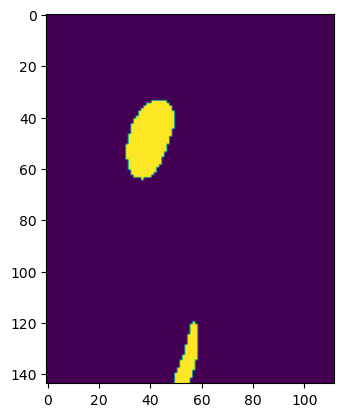

In [ ]:
plt.imshow(x[b, :,:, t, 0])
plt.colorbar()
plt.show()
plt.imshow(y[b, :,:, t,])
plt.show()

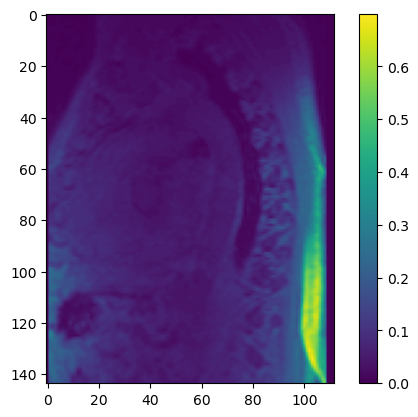

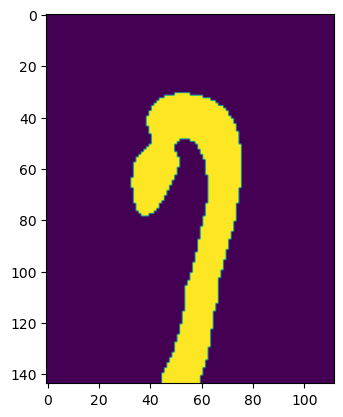

In [ ]:
plt.imshow(res_x[b, :,:, t, 0])
plt.colorbar()
plt.show()
plt.imshow(res_y[b, :,:, t,])
plt.show()